In [1]:
!!cd water.zip/
!!unzip water.zip

['Archive:  water.zip',
 '   creating: Water/',
 '  inflating: Water/train0500_63.xsf  ',
 '  inflating: Water/train2000_1816.xsf  ',
 '  inflating: Water/train2000_1802.xsf  ',
 '  inflating: Water/train0500_77.xsf  ',
 '  inflating: Water/train1000_708.xsf  ',
 '  inflating: Water/train1000_720.xsf  ',
 '  inflating: Water/train2000_1194.xsf  ',
 '  inflating: Water/train1000_734.xsf  ',
 '  inflating: Water/train2000_1180.xsf  ',
 '  inflating: Water/train1000_907.xsf  ',
 '  inflating: Water/train2000_1619.xsf  ',
 '  inflating: Water/train1000_913.xsf  ',
 '  inflating: Water/train2000_1157.xsf  ',
 '  inflating: Water/train0500_233.xsf  ',
 '  inflating: Water/train2000_1631.xsf  ',
 '  inflating: Water/train2000_1625.xsf  ',
 '  inflating: Water/train0500_227.xsf  ',
 '  inflating: Water/train0500_88.xsf  ',
 '  inflating: Water/train2000_1143.xsf  ',
 '  inflating: Water/train2000_1396.xsf  ',
 '  inflating: Water/train1000_522.xsf  ',
 '  inflating: Water/train2000_1382.xsf  '

In [16]:
import numpy as np
import pandas as pd
import re
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 15})
plt.close("all")

In [3]:
try:
  import aenet
  print("successfully imported aenet")
except ImportError:
  !! git clone https://github.com/atomisticnet/aenet.git
  !! cd aenet/lib && make
  !! cd aenet/src && make -f makefiles/Makefile.gfortran_serial
  !! cd aenet/src && make -f makefiles/Makefile.gfortran_serial lib
  !! cd aenet/python3 && python3 setup.py build_ext --inplace
  !! cd aenet/python3 && pip install -e . --user
  print("completed installation of aenet")

completed installation of aenet


In [4]:
try:
  import ase
  print("successfully imported ase")
except ImportError:
  !! pip install ase --user --upgrade
  print("completed installing ASE")

completed installing ASE


In [1]:
try:
  import aenet
  import ase
  print("Both aenet and ase could be imported. You are all set for the tutorial.")
except ImportError:
  print("The notebook needs to be restarted. Run this cell again once the restart is done.")
  import os
  os.kill(os.getpid(), 9)
import ase
import ase.spacegroup
import ase.visualize
atoms = ase.io.read("/content/Water/train0500_1.xsf")
ase.visualize.view(atoms, viewer='x3d')

Both aenet and ase could be imported. You are all set for the tutorial.


In [3]:
import glob

mydir = "/content/Water"

file_list = glob.glob(mydir + "/*.xsf")
for i in file_list:
  print(i)

/content/Water/train2000_1138.xsf
/content/Water/train2000_1431.xsf
/content/Water/train0500_362.xsf
/content/Water/train2000_1651.xsf
/content/Water/train2000_1134.xsf
/content/Water/train1000_852.xsf
/content/Water/train2000_1468.xsf
/content/Water/train1000_670.xsf
/content/Water/train2000_1204.xsf
/content/Water/train2000_1121.xsf
/content/Water/train0500_67.xsf
/content/Water/train2000_1054.xsf
/content/Water/train2000_1523.xsf
/content/Water/train2000_1626.xsf
/content/Water/train2000_1027.xsf
/content/Water/train2000_1493.xsf
/content/Water/train2000_1551.xsf
/content/Water/train2000_1162.xsf
/content/Water/train0500_204.xsf
/content/Water/train2000_1875.xsf
/content/Water/train1000_773.xsf
/content/Water/train1000_496.xsf
/content/Water/train0500_415.xsf
/content/Water/train1000_640.xsf
/content/Water/train2000_1594.xsf
/content/Water/train0500_397.xsf
/content/Water/train2000_1428.xsf
/content/Water/train1000_532.xsf
/content/Water/train1000_779.xsf
/content/Water/train2000_10

In [2]:
%cd /content/01_generate
%ls

/content/01_generate
correctgenerate.in  H.fingerprint.stp  O.fingerprint.stp


In [4]:
! head -n 100 correctgenerate.in

OUTPUT H2O.train

TYPES
2
H 0.000000000
O 0.000000000

SETUPS
H    H.fingerprint.stp
O    O.fingerprint.stp

FILES
1886
/content/Water/train2000_1138.xsf
/content/Water/train2000_1431.xsf
/content/Water/train0500_362.xsf
/content/Water/train2000_1651.xsf
/content/Water/train2000_1134.xsf
/content/Water/train1000_852.xsf
/content/Water/train2000_1468.xsf
/content/Water/train1000_670.xsf
/content/Water/train2000_1204.xsf
/content/Water/train2000_1121.xsf
/content/Water/train0500_67.xsf
/content/Water/train2000_1054.xsf
/content/Water/train2000_1523.xsf
/content/Water/train2000_1626.xsf
/content/Water/train2000_1027.xsf
/content/Water/train2000_1493.xsf
/content/Water/train2000_1551.xsf
/content/Water/train2000_1162.xsf
/content/Water/train0500_204.xsf
/content/Water/train2000_1875.xsf
/content/Water/train1000_773.xsf
/content/Water/train1000_496.xsf
/content/Water/train0500_415.xsf
/content/Water/train1000_640.xsf
/content/Water/train2000_1594.xsf
/content/Water/train0500_397.xsf
/conten

In [5]:
! /content/aenet/bin/generate.x-2.0.4-gfortran_serial correctgenerate.in > generate.out

In [6]:
!cat O.fingerprint.stp

DESCR
  Structural fingerprint setup for O in bulk TiO2.
  Ref.: N. Artrith and A. Urban, Comp. Mater. Sci. (2016)
END DESCR

ATOM O

ENV  2
H
O

RMIN 0.75d0

SYMMFUNC type=Behler2011
30
G=2 type2=H   eta=0.001  Rs=0.0000  Rc=12.0000
G=2 type2=O   eta=0.001  Rs=0.0000  Rc=12.0000
G=2 type2=H   eta=0.010  Rs=0.0000  Rc=12.0000
G=2 type2=O   eta=0.010  Rs=0.0000  Rc=12.0000
G=2 type2=H   eta=0.030  Rs=0.0000  Rc=12.0000
G=2 type2=O   eta=0.030  Rs=0.0000  Rc=12.0000
G=2 type2=H   eta=0.090  Rs=0.0000  Rc=12.0000
G=2 type2=O   eta=0.090  Rs=0.0000  Rc=12.0000
G=2 type2=H   eta=0.150  Rs=0.9000  Rc=12.0000
G=2 type2=O   eta=0.150  Rs=4.0000  Rc=12.0000
G=2 type2=H   eta=0.300  Rs=0.9000  Rc=12.0000
G=2 type2=O   eta=0.300  Rs=4.0000  Rc=12.0000
G=2 type2=H   eta=0.600  Rs=0.9000  Rc=12.0000
G=2 type2=O   eta=0.600  Rs=4.0000  Rc=12.0000
G=2 type2=H   eta=1.500  Rs=0.9000  Rc=12.0000
G=2 type2=O   eta=1.500  Rs=4.0000  Rc=12.0000
G=4 type2=H  type3=O    eta=0.001 lambda= -1.0  zeta= 4.0  Rc

In [7]:
%ls
!cat generate.out

Streaming output truncated to the last 5000 lines.
      1   O      17
      2   H      17
      3   H      17
      4   O      17
      5   H      17
      6   H      17
      7   O      17
      8   H      17
      9   H      17
     10   O      17
     11   H      17
     12   H      17
     13   O      17
     14   H      17
     15   H      17
     16   O      17
     17   H      17
     18   H      17
   1626      18       2  -2.54841546E+01  /content/Water/train0500_301.xsf
      1   O      17
      2   H      17
      3   H      17
      4   O      17
      5   H      17
      6   H      17
      7   O      17
      8   H      17
      9   H      17
     10   O      17
     11   H      17
     12   H      17
     13   O      17
     14   H      17
     15   H      17
     16   O      17
     17   H      17
     18   H      17
   1627      18       2  -2.54841696E+01  /content/Water/train2000_1275.xsf
      1   O      17
      2   H      17
      3   H      17
      4   O      1

In [8]:
%cd /content/

/content


In [9]:
%cd /content/02_train
%ls

/content/02_train
train.in


In [10]:
%cat train.in

TRAININGSET H2O.train
TESTPERCENT 20
ITERATIONS  100 

METHOD
bfgs

SAVE_ENERGIES

NETWORKS
! atom   network         hidden
! types  file-name       layers  nodes:activation
  O      O.10t-10t.nn    2       10:tanh 10:tanh
  H      H.10t-10t.nn    2       10:tanh 10:tanh



In [11]:
! ln -s /content/01_generate/H2O.train
%ls

H2O.train@  train.in


In [12]:
!cp ../content/01_generate/H2O.train .
%ls

cp: cannot stat '../content/01_generate/H2O.train': No such file or directory
H2O.train@  train.in


In [13]:
! /content/aenet/bin/train.x-2.0.4-gfortran_serial train.in | tee train.out
%ls

                       Training process started.                       
                                                                       
                          2023-03-19  06:31:15                         
                                                                       

 Copyright (C) 2015-2018 Nongnuch Artrith and Alexander Urban

 This program is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
 Mozilla Public License, v. 2.0, for more details.

 ----------------------------------------------------------------------
                       Training set normalization                      
 ----------------------------------------------------------------------

 The training set will be normalized now.  Depending on its size this
 process can take a while.  The normalized data set will be written to
 another file. Load that file in future to avo

In [14]:
%cd /content/

/content


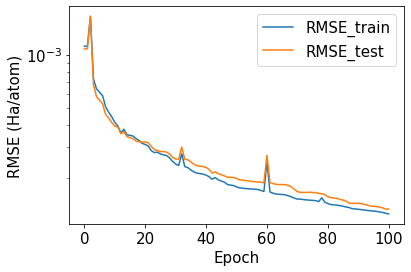

In [17]:
errors = []
with open("/content/02_train/train.out") as fp:
  for line in fp:
    if re.match("^ *[0-9].*<$", line):
      errors.append([float(a) for a in line.split()[1:-1]])
errors = np.array(errors)
errors = pd.DataFrame(
    data=errors, 
    columns=['MAE_train', 'RMSE_train', 'MAE_test', 'RMSE_test'])
ax = errors[['RMSE_train', 'RMSE_test']].plot(logy=True)
ax.set_xlabel("Epoch"); ax.set_ylabel("RMSE (Ha/atom)")
plt.show()

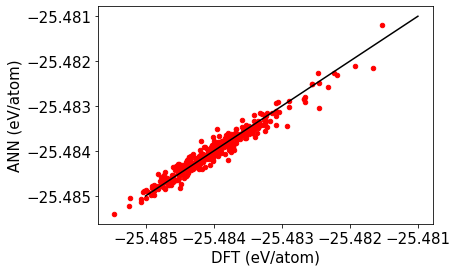

In [21]:
test = "/content/02_train/energies.test.0"
test_errors = np.loadtxt(test, skiprows=1, usecols=(3,4))
limits = np.linspace(-25.485, -25.481)
plt.plot(limits, limits, color="black")
plt.ticklabel_format(useOffset=False)
plt.scatter(test_errors[:,0], test_errors[:,1], color="red", s=20, label="validation")
plt.xlabel('DFT (eV/atom)')
plt.ylabel('ANN (eV/atom)')
plt.show()

In [23]:
%cd /content/03_predict/
!cp ../02_train/H.10t-10t.nn .
!cp ../02_train/O.10t-10t.nn .
! /content/aenet/bin/predict.x-2.0.4-gfortran_serial correctpredict.in | tee predict.out
%ls

/content/03_predict
                  Atomic Energy Network Interpolation                  
                                                                       
                          2023-03-19  06:38:55                         
                                                                       

 Copyright (C) 2015-2018 Nongnuch Artrith and Alexander Urban

 This program is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
 Mozilla Public License, v. 2.0, for more details.

 Atomic species : H
 File name      : H.10t-10t.nn

 ----------------------------------------------------------------------
                           Training set info.                          
 ----------------------------------------------------------------------

 Training set file                   : H2O.train.scaled
 Number of structures in the data set: 1886

 Atomic specie

In [24]:
%cd /content
%ls
!rm -rf *
%ls

/content
01_generate/  02_train/  03_predict/  aenet/  sample_data/  Water/  water.zip
